In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
factoryDF = pd.read_csv('../DATA/factory.csv', header=None)
factoryDF.columns = ['TOC번호','수용가번호','법정동분류코드','측정일자','측정시각','SG전력사용량','전체전력사용량']

In [12]:
factoryDF.head(), factoryDF.tail()

factoryDF.to_csv('../DATA/factory_202112.csv', columns=['TOC번호', '수용가번호', '법정동분류코드', '측정일자', '측정시각', 'SG전력사용량', '전체전력사용량'], index=False)

In [5]:
# '수용가번호' == 1147 인 데이터만 추출
factoryDF[factoryDF['수용가번호'] == '1147']

# 여기서 측정일자 == '20211201' 인 데이터만 추출
factoryDF[(factoryDF['측정일자'] == 20211201) & (factoryDF['수용가번호'] == '1225')].sort_values(by='측정시각')

,TOC번호,수용가번호,법정동분류코드,측정일자,측정시각,SG전력사용량,전체전력사용량
6905,E000000004,1225,2729000000,20211201,0,86.97,0.0
7006,E000000004,1225,2729000000,20211201,1,153.82,0.0
3943,E000000004,1225,2729000000,20211201,2,126.97,0.0
4069,E000000004,1225,2729000000,20211201,3,99.87,0.0
966,E000000004,1225,2729000000,20211201,4,104.79,0.0
4293,E000000004,1225,2729000000,20211201,5,159.19,0.0
4415,E000000004,1225,2729000000,20211201,6,107.31,0.0
7567,E000000004,1225,2729000000,20211201,7,235.91,0.0
7663,E000000004,1225,2729000000,20211201,8,316.94,0.0
1527,E000000004,1225,2729000000,20211201,9,524.42,0.0


측정시각
0       165.815297
1       162.441808
2       173.026141
3       172.955728
4       171.808097
5       155.159034
6       175.158461
7       176.787024
8       163.355094
9       169.075040
10      181.605856
11      164.840035
12      176.011717
13      173.939176
14      182.689953
15      172.993297
16      180.803298
17      196.852115
18    47994.677412
19      182.264306
20      173.874027
21      171.520408
22      141.374666
23      168.452497
Name: 전체전력사용량, dtype: float64


c:\Users\wjs31\OneDrive\문서\KDT-5\KDT5_Notes\.conda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wjs31\OneDrive\문서\KDT-5\KDT5_Notes\.conda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wjs31\OneDrive\문서\KDT-5\KDT5_Notes\.conda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wjs31\OneDrive\문서\KDT-5\KDT5_Notes\.conda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


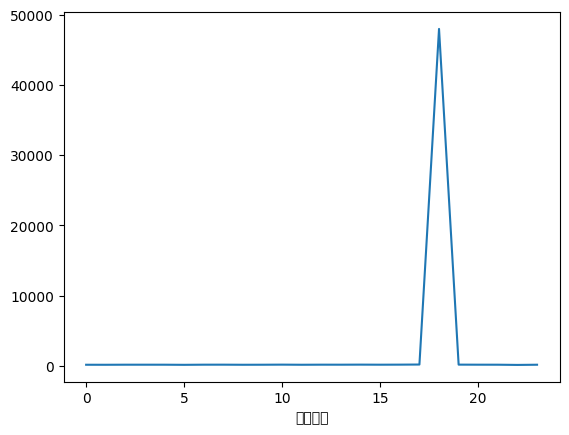

In [6]:
# 측정시각별로 SG전력사용량의 평균을 구하고 그래프로 출력
grouped = factoryDF.groupby('측정시각')
result = grouped['전체전력사용량'].mean()
print(result)
result.plot()
plt.show()

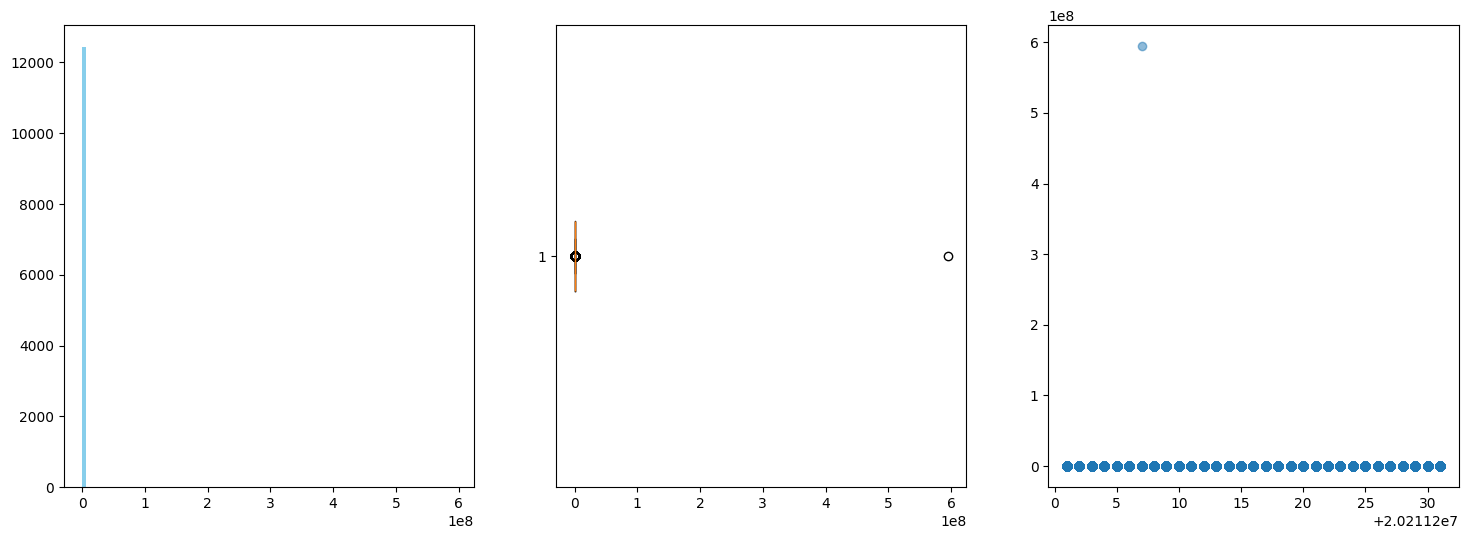

In [20]:
# 18시의 측정시간이 유난히 큰 이유?
factoryDF[factoryDF['측정시각'] == 18]['전체전력사용량'].describe()
# 평균 4만, 편차 500만, 75%도 0이고 max가 5억ㅋ

fac_18 = factoryDF[factoryDF['측정시각'] == 18]

# hist, boxplot
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.hist(fac_18['전체전력사용량'], bins=100, color='skyblue')
plt.subplot(1, 3, 2)
plt.boxplot(fac_18['전체전력사용량'], vert=False)
plt.subplot(1, 3, 3)
plt.scatter(fac_18['측정일자'], fac_18['전체전력사용량'], alpha=0.5)
plt.show()

count    12434.000000
mean       177.959596
std       1458.422249
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      22243.479000
Name: 전체전력사용량, dtype: float64


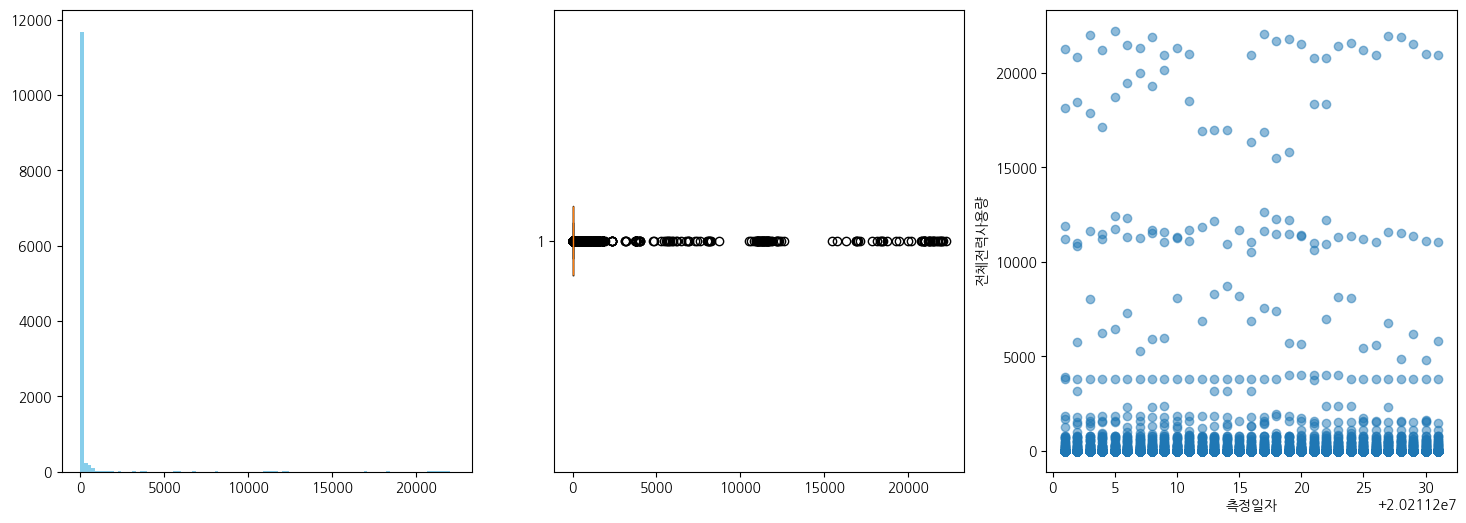

In [25]:
# 이상치를 제거하자 : 5억 이상인 데이터 제거
fac_18 = fac_18[fac_18['전체전력사용량'] < 500000000]
print(fac_18['전체전력사용량'].describe())

# 한글 폰트
plt.rc('font', family='NanumGothic')

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.hist(fac_18['전체전력사용량'], bins=100, color='skyblue')
plt.subplot(1, 3, 2)
plt.boxplot(fac_18['전체전력사용량'], vert=False)
plt.subplot(1, 3, 3)
plt.scatter(fac_18['측정일자'], fac_18['전체전력사용량'], alpha=0.5)
plt.xlabel('측정일자')
plt.ylabel('전체전력사용량')
plt.show()

큰 이상치는 제거됐고, 3번 그래프에서 사용량별 모든 일자에 분포가 있는 걸 보면 큰 값을 가진 공장이 따로 있는 것을 확인 할 수 있음. 한 수용가에서 18시마다 찍히는 사용량으로 판단되고, 이를 확인해보자.

In [31]:
# 수용가별 전체전력사용량의 합
grouped = factoryDF.groupby('수용가번호')
result = grouped['전체전력사용량'].sum().sort_values(ascending=False)
print(result)

# 0이 아닌 데이터 개수
result[result != 0].count() # 55개

수용가번호
C20180516131340041      6.008169e+08
IMC0000066JP06300001    1.252018e+07
C20180516131410464      8.149950e+06
IMC0000067JP06300001    6.602730e+06
IMC0000052CJ00200001    4.506545e+06
                            ...     
1165                    0.000000e+00
1164                    0.000000e+00
1162                    0.000000e+00
1161                    0.000000e+00
1243                    0.000000e+00
Name: 전체전력사용량, Length: 408, dtype: float64


55

408가지의 수용가번호 중 전체전력사용량에 항목이 있는 수용가는 55개 뿐이므로,   
전체전력사용량이 아닌 SG전력사용량을 기반으로 분석을 진행하겠음!

측정시각
0       362.845120
1       355.750717
2       375.928138
3       367.936843
4       365.425098
5       350.084943
6       373.539497
7       390.700264
8       393.913496
9       412.803544
10      408.911763
11      393.281845
12      393.327371
13      408.115510
14      414.279041
15      400.742813
16      410.051462
17      415.005833
18    48197.390975
19      392.579609
20      383.237391
21      380.289860
22      344.669654
23      371.876259
Name: SG전력사용량, dtype: float64


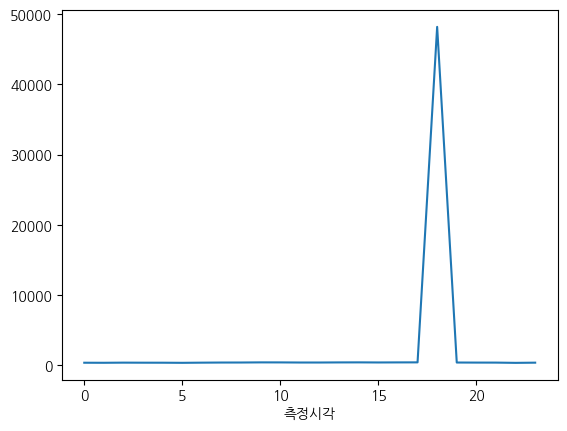

In [32]:
# # 측정시각별로 SG전력사용량의 평균을 구하고 그래프로 출력
grouped = factoryDF.groupby('측정시각')
result = grouped['SG전력사용량'].mean()
print(result)
result.plot()
plt.show()

수용가번호
C20180516131340041      6.008169e+08
IMC0000066JP06300001    1.252018e+07
1040                    8.687624e+06
C20180516131410464      8.149950e+06
IMC0000067JP06300001    6.602730e+06
                            ...     
1245                    0.000000e+00
1251                    0.000000e+00
1252                    0.000000e+00
1258                    0.000000e+00
1243                    0.000000e+00
Name: SG전력사용량, Length: 408, dtype: float64
254


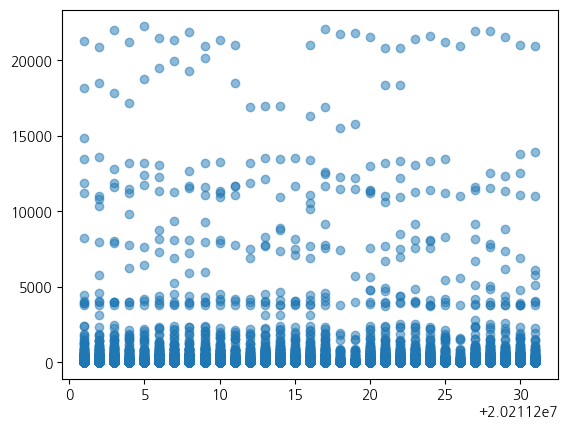

In [38]:
# 같은 원리로 18시의 이상치 제거
fac_18 = factoryDF[factoryDF['측정시각'] == 18]
fac_18 = fac_18[fac_18['SG전력사용량'] < 500000000]

# 수용가별 SG전력사용량의 합
grouped = factoryDF.groupby('수용가번호')
result = grouped['SG전력사용량'].sum().sort_values(ascending=False)
print(result)

# 0이 아닌 데이터 개수
print(result[result != 0].count())  # 254개

plt.scatter(fac_18['측정일자'], fac_18['SG전력사용량'], alpha=0.5)

408 수용가 중 254개의 수용가가 SG전력사용량을 가지고 있음.  
실제로 SG와 전체전력사용량 모두가 0인 데이터가 몇 개인지 확인하기

In [47]:
# SG전력사용량과 전체전력사용량이 모두 0인 수용가번호 개수
grouped = factoryDF.groupby('수용가번호')
# 전체 수용가번호 개수
print(grouped['수용가번호'].count().count())
# sg 와 전체 전력사용량이 모두 0인 수용가번호 개수
print(grouped['SG전력사용량'].sum()[grouped['SG전력사용량'].sum() == 0].count())

# 408 = 154 + 254

408
154


전체 수용가 = 408개, 모두 0인 수용가 = 154개, SG전력사용량이 0이 아닌 수용가 = 254개  
부분집합 관계 : SG가 0이면 전체전력도 0, 전체전력이 0이라도 SG가 0이 아닐 수 있음

=> SG전력사용량이 타당한 값이라는 정당성 부여!  

이제 다음 파일에서 수용가별 SG전력사용량을 확인하고, 적절한 수용가를 선택해볼 예정

In [51]:
# 파일 정리 : SG전력사용량이 5억 이상인 데이터 제거
data_202112 = pd.read_csv('../DATA/factory_202112.csv')
print(data_202112.shape)
data_202112 = data_202112[(data_202112['SG전력사용량'] < 500000000) & (data_202112['전체전력사용량'] < 500000000)]
print(data_202112.shape)
print(data_202112.describe())
data_202112.to_csv('../DATA/factory_2112.csv', index=False)



(290214, 7)
(290213, 7)
            법정동분류코드          측정일자           측정시각        SG전력사용량        전체전력사용량
count  2.902130e+05  2.902130e+05  290213.000000  290213.000000  290213.000000
mean   2.890808e+09  2.021122e+07      11.481860     385.244315     172.107100
std    5.529566e+08  8.941924e+00       6.908133    1721.585839    1441.258137
min    1.117013e+09  2.021120e+07       0.000000       0.000000       0.000000
25%    2.720000e+09  2.021121e+07       6.000000       0.000000       0.000000
50%    2.729000e+09  2.021122e+07      11.000000       7.850000       0.000000
75%    2.771000e+09  2.021122e+07      17.000000     174.100000       0.000000
max    5.013026e+09  2.021123e+07      23.000000   23639.131000   23639.131000


In [61]:
data_2105 = pd.read_csv('../DATA/KSG_KSG2019111100EMUS01a_20210501000000.csv', encoding='cp949', header=None)
print(data_2105.shape)
print(data_2105.describe())
data_2105.columns = ['TOC번호','수용가번호','법정동분류코드','측정일자','측정시각','SG전력사용량','전체전력사용량']
data_2105 = data_2105[(data_2105['SG전력사용량'] < 500000000) & (data_2105['전체전력사용량'] < 500000000)]
print(data_2105.shape)
print(data_2105.describe())
# 여긴 없네?
data_2105.to_csv('../DATA/factory_2105.csv', index=False)


(211939, 7)
                  2             3              4              5              6
count  2.119390e+05  2.119390e+05  211939.000000  211939.000000  211939.000000
mean   2.933183e+09  2.021052e+07      11.569593     431.512141     222.976068
std    5.912388e+08  6.394931e+00       6.914750    2378.045475    1922.055082
min    1.117013e+09  2.021050e+07       0.000000       0.000000       0.000000
25%    2.720000e+09  2.021052e+07       6.000000       0.000000       0.000000
50%    2.729000e+09  2.021052e+07      12.000000      10.896000       0.000000
75%    2.771000e+09  2.021053e+07      18.000000     165.415000       0.000000
max    5.013026e+09  2.021053e+07      23.000000  491447.000000   37877.000000
(211939, 7)
            법정동분류코드          측정일자           측정시각        SG전력사용량        전체전력사용량
count  2.119390e+05  2.119390e+05  211939.000000  211939.000000  211939.000000
mean   2.933183e+09  2.021052e+07      11.569593     431.512141     222.976068
std    5.912388e+08  6.39493

(306989, 7)
                  3              4             5             6
count  3.069890e+05  306989.000000  3.069890e+05  3.069890e+05
mean   2.019082e+07      11.477998  8.918255e+04  7.196778e+02
std    9.013310e+00       6.911529  2.367518e+07  1.716790e+06
min    2.019080e+07       0.000000  0.000000e+00 -4.294766e+08
25%    2.019081e+07       5.000000  2.520000e+00  0.000000e+00
50%    2.019082e+07      11.000000  4.165000e+01  0.000000e+00
75%    2.019082e+07      17.000000  2.987440e+02  0.000000e+00
max    2.019083e+07      23.000000  6.563252e+09  5.928762e+08
(306983, 7)
               측정일자           측정시각       SG전력사용량       전체전력사용량
count  3.069830e+05  306983.000000  3.069830e+05  3.069830e+05
mean   2.019082e+07      11.478026  5.259066e+02 -2.610353e+03
std    9.013283e+00       6.911571  1.302950e+04  1.096259e+06
min    2.019080e+07       0.000000  0.000000e+00 -4.294766e+08
25%    2.019081e+07       5.000000  2.520000e+00  0.000000e+00
50%    2.019082e+07      11.000

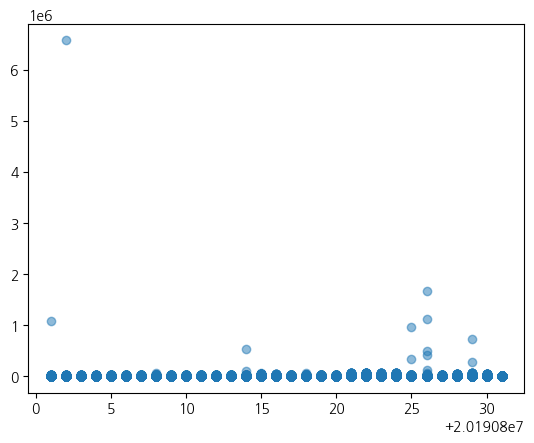

(306979, 7)
               측정일자           측정시각        SG전력사용량       전체전력사용량
count  3.069790e+05  306979.000000  306979.000000  3.069790e+05
mean   2.019082e+07      11.478023     491.915732 -2.635327e+03
std    9.013230e+00       6.911614    3488.456582  1.096201e+06
min    2.019080e+07       0.000000       0.000000 -4.294766e+08
25%    2.019081e+07       5.000000       2.520000  0.000000e+00
50%    2.019082e+07      11.000000      41.640000  0.000000e+00
75%    2.019082e+07      17.000000     298.696500  0.000000e+00
max    2.019083e+07      23.000000  967100.950000  5.399640e+05


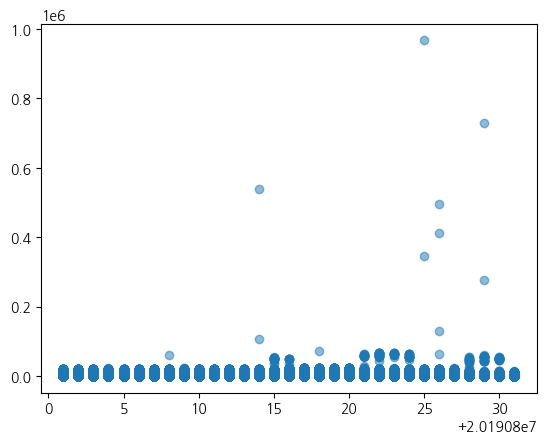

(306970, 7)
               측정일자           측정시각        SG전력사용량       전체전력사용량
count  3.069700e+05  306970.000000  306970.000000  3.069700e+05
mean   2.019082e+07      11.477988     478.882831 -2.637513e+03
std    9.013213e+00       6.911697    2089.554864  1.096216e+06
min    2.019080e+07       0.000000       0.000000 -4.294766e+08
25%    2.019081e+07       5.000000       2.520000  0.000000e+00
50%    2.019082e+07      11.000000      41.636000  0.000000e+00
75%    2.019082e+07      17.000000     298.627500  0.000000e+00
max    2.019083e+07      23.000000   74092.303000  7.409230e+04


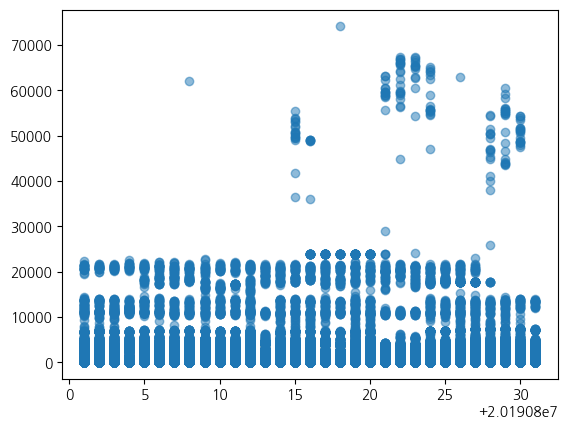

In [68]:
data = pd.read_csv('../DATA/KSG_KSG2019111100EMUS01a_20190801000000.csv', encoding='cp949', header=None)
print(data.shape)
print(data.describe())
data.columns = ['TOC번호','수용가번호','법정동분류코드','측정일자','측정시각','SG전력사용량','전체전력사용량']
# 여긴 이상치가 좀 더 낮게 분포한다 : 5억 -> 1억
data = data[(data['SG전력사용량'] < 100000000) & (data['전체전력사용량'] < 100000000)]
print(data.shape)
print(data.describe())

plt.scatter(data['측정일자'], data['SG전력사용량'], alpha=0.5)  # 더 이상치를 제거하기
plt.show()

data = data[(data['SG전력사용량'] < 1000000) & (data['전체전력사용량'] < 1000000)]
print(data.shape)
print(data.describe())

plt.scatter(data['측정일자'], data['SG전력사용량'], alpha=0.5)  # 조금만 더 이상치를 제거하기...
plt.show()

data = data[(data['SG전력사용량'] < 100000) & (data['전체전력사용량'] < 100000)]
print(data.shape)
print(data.describe())

plt.scatter(data['측정일자'], data['SG전력사용량'], alpha=0.5)
plt.show()

19년도 데이터는 2만부터 매일 분포한다 : 2.5만개 이상의 이상치 제거

(306817, 7)
               측정일자           측정시각        SG전력사용량       전체전력사용량
count  3.068170e+05  306817.000000  306817.000000  3.068170e+05
mean   2.019082e+07      11.477637     451.841954 -2.639477e+03
std    9.013063e+00       6.911890    1693.928325  1.096489e+06
min    2.019080e+07       0.000000       0.000000 -4.294766e+08
25%    2.019081e+07       5.000000       2.510000  0.000000e+00
50%    2.019082e+07      11.000000      41.540000  0.000000e+00
75%    2.019082e+07      17.000000     297.790000  0.000000e+00
max    2.019083e+07      23.000000   24171.880000  2.308261e+04


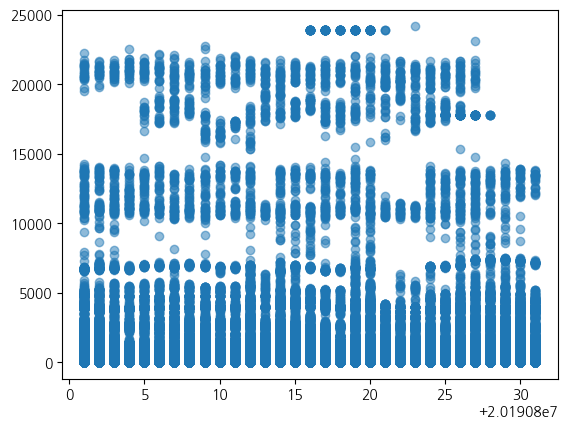

In [70]:
# 2.5만으로 제거
data = data[(data['SG전력사용량'] < 25000) & (data['전체전력사용량'] < 25000)]
print(data.shape)
print(data.describe())
plt.scatter(data['측정일자'], data['SG전력사용량'], alpha=0.5)
plt.show()

In [71]:
# 파일 저장
data.to_csv('../DATA/factory_1908.csv', index=False)

## 요약
1. SG전력사용량과 전체전력사용량을 분석해 본 결과, SG전력사용량이 타당한 값이라는 정당성 부여
2. 21년 5월 데이터는 SG전력사용량 기준 5억 이상을 이상치 제거
3. 21년 12월 데이터도 SG전력사용량 기준 5억 이상을 이상치 제거
4. 19년 8월 데이터는 매일 값이 있는 데이터를 기준으로 2.5만 이상을 이상치로 제거
5. 데이터 손실은 0.1% 이하
6. 따로 factory_YYMM.csv 파일로 저장, 불필요한 파일은 /Used_Data에 저장